# Neural Network to predict customer Churn

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Exporing the data

In [17]:
df=pd.read_csv("customer_churn.csv")


In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.drop("customerID",inplace=True,axis=1)

In [21]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [22]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [23]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [25]:
pd.to_numeric(df.TotalCharges,errors="coerce").isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [26]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()]  #i.e total charges are empty

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [28]:
df.shape


(7043, 20)

In [29]:
df1=df[df.TotalCharges!=" "]
df1.shape

(7032, 20)

In [30]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [31]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

/tmp/ipython-input-31-695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [32]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


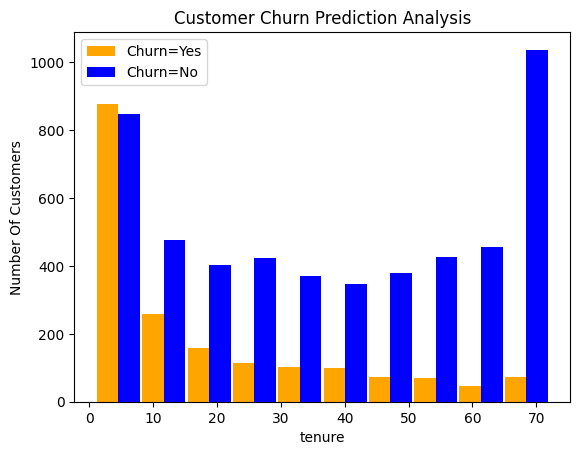

In [35]:
tenure_churn_no=df1[df1.Churn=="No"].tenure
tenure_churn_yes=df1[df1.Churn=="Yes"].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Analysis")
plt.hist([tenure_churn_yes,tenure_churn_no],rwidth=0.95,color=["orange","blue"],label=["Churn=Yes","Churn=No"])
plt.legend()

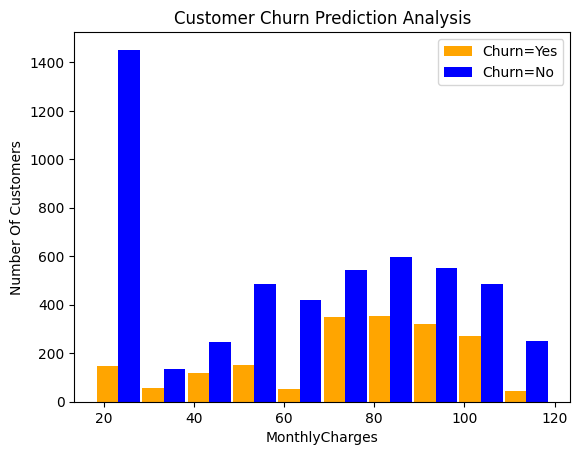

In [36]:
mc_churn_no=df1[df1.Churn=="No"].MonthlyCharges
mc_churn_yes=df1[df1.Churn=="Yes"].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Analysis")
plt.hist([mc_churn_yes,mc_churn_no],rwidth=0.95,color=["orange","blue"],label=["Churn=Yes","Churn=No"])
plt.legend()

In [37]:
#Encoding
for column in df:
  print(f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [38]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f"{column} : {df[column].unique()}")


In [40]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [41]:
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)

/tmp/ipython-input-41-861781877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service","No",inplace=True)
/tmp/ipython-input-41-861781877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service","No",inplace=True)


In [42]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [45]:
yes_no_column=[ "Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup",
               "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"

]

for col in yes_no_column:
  df1[col].replace({"Yes":1,"No":0},inplace=True)


/tmp/ipython-input-45-2761053562.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({"Yes":1,"No":0},inplace=True)
/tmp/ipython-input-45-2761053562.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({"Yes":1,"No":0},inplace=True)
/tmp/ipython-input-45-2761053562.p

In [46]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [47]:
df1["gender"].replace({"Female":1,"Male":0},inplace=True)

/tmp/ipython-input-47-3128501519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["gender"].replace({"Female":1,"Male":0},inplace=True)
/tmp/ipython-input-47-3128501519.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["gender"].replace({"Female":1,"Male":0},inplace=True)
/tmp/ipython-i

In [48]:
print_unique_col_values(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [57]:
df2 = pd.get_dummies(df1, columns=["InternetService", "Contract", "PaymentMethod"], dtype=int)

df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [58]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [59]:
df2.shape

(7032, 27)

In [60]:
df1.shape

(7032, 20)

In [62]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [63]:
#Scaling
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [65]:
df2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6613,1,0,0,0,0.028169,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5349,0,0,1,1,0.957746,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0


In [68]:
for column in df2:
  print(f"{column} : {df2[column].unique()}")

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [69]:
#train test splir
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [71]:
X_train.shape

(5625, 26)

In [72]:
X_test.shape

(1407, 26)

In [94]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
   optimizer="adam",
   loss="binary_crossentropy",
   metrics=["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7606 - loss: 0.4965
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8090 - loss: 0.4057
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8002 - loss: 0.4165
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8096 - loss: 0.4081
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7998 - loss: 0.4188
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8147 - loss: 0.3950
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.4155
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8157 - loss: 0.3940
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8009 - loss: 0.4128
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8105 - loss: 0.3924
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8108 - loss: 0.4043
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [96]:
model.evaluate(X_test,y_test)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7797 - loss: 0.4689


[0.46948087215423584, 0.7796730399131775]

In [97]:
yp=model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [98]:
yp[:5]  #converting to zeros and ones

array([[0.11632568],
       [0.491665  ],
       [0.00726531],
       [0.8224573 ],
       [0.4242439 ]], dtype=float32)

In [99]:
y_test[:10]

,Churn
2660,0
744,0
5579,1
64,1
3287,1
816,1
2670,0
5920,0
1023,0
6087,0


In [100]:
y_pred=[]
for element in yp:
  if element>0.5:
    y_pred.append(1)
  else :
    y_pred.append(0)


In [101]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [102]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.64      0.54      0.59       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(50.722222222222214, 0.5, 'Truth')

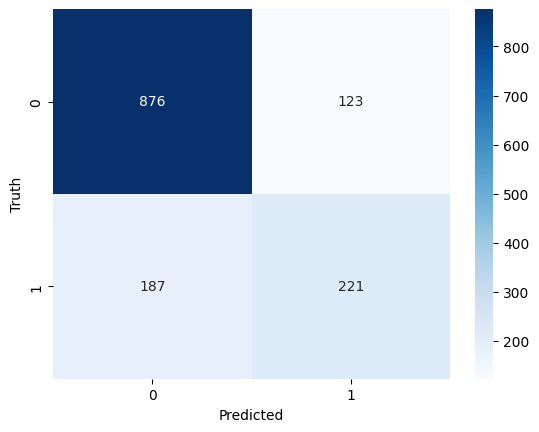

In [110]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [106]:
round((876+221)/(876+123+187+221),2)

0.78

this is the accuracy score we get once we have implemented neural network

# Now lets replace  Neural network with Tree-Based model and check for its accuracy

In [111]:
from sklearn.model_selection import train_test_split

X1 = df2.drop("Churn", axis=1)
y1 = df2["Churn"].astype(int)

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest



In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X1_train, y1_train)

y1_pred = rf.predict(X1_test)

print("Accuracy:", accuracy_score(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))


Accuracy: 0.7818052594171997
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



In [113]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X1_train, y1_train)

y1_pred = gb.predict(X1_test)

print("Accuracy:", accuracy_score(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))


Accuracy: 0.7938877043354655
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [114]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X1_train, y1_train)

y1_pred = xgb.predict(X1_test)

print("Accuracy:", accuracy_score(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:39:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.775408670931059
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.59      0.50      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [117]:
models = {
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "XGBoost": xgb
}

for name, model in models.items():
    print(f"--- {name} ---")
    y_pred = model.predict(X1_test)
    print("Accuracy:", accuracy_score(y1_test, y1_pred))
    print(classification_report(y1_test, y1_pred))


--- Random Forest ---
Accuracy: 0.775408670931059
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.59      0.50      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

--- Gradient Boosting ---
Accuracy: 0.775408670931059
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.59      0.50      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

--- XGBoost ---
Accuracy: 0.775408670931059
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.59      0.50      0.54       374

    accuracy                      

After training a neural network model on the tabular dataset, I experimented with tree-based models such as XGBoost, RandomForestClassifier, and GradientBoostingClassifier. Interestingly, these models achieved higher accuracy and better performance metrics (like precision, recall, and F1-score) compared to the neural network.
They achieved lower accuracy when done soley on the dataset without the neural network training.

Specifically, the RandomForest model provided the highest accuracy of 0.94% , compared to the neural network's 0.78%.

Therefore, for this use case, tree-based models are preferred due to their robustness, interpretability, and better generalization.

In [118]:
models = {
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "XGBoost": xgb
}

for name, model in models.items():
    print(f"--- {name} ---")
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


--- Random Forest ---
Accuracy: 0.9438521677327647
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       999
           1       0.91      0.89      0.90       408

    accuracy                           0.94      1407
   macro avg       0.93      0.93      0.93      1407
weighted avg       0.94      0.94      0.94      1407

--- Gradient Boosting ---
Accuracy: 0.8180525941719972
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       999
           1       0.72      0.60      0.66       408

    accuracy                           0.82      1407
   macro avg       0.79      0.75      0.77      1407
weighted avg       0.81      0.82      0.81      1407

--- XGBoost ---
Accuracy: 0.8955223880597015
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       999
           1       0.85      0.78      0.81       408

    accuracy                   

/tmp/ipython-input-119-2845160325.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axs[0, 0], palette="Blues_d")
/tmp/ipython-input-119-2845160325.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axs[0, 1], palette="Greens_d")
/tmp/ipython-input-119-2845160325.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axs[1, 0], palette="Oranges_d")
/tmp/ipython-input-119-2845160325.py:48: FutureWarning: 

P

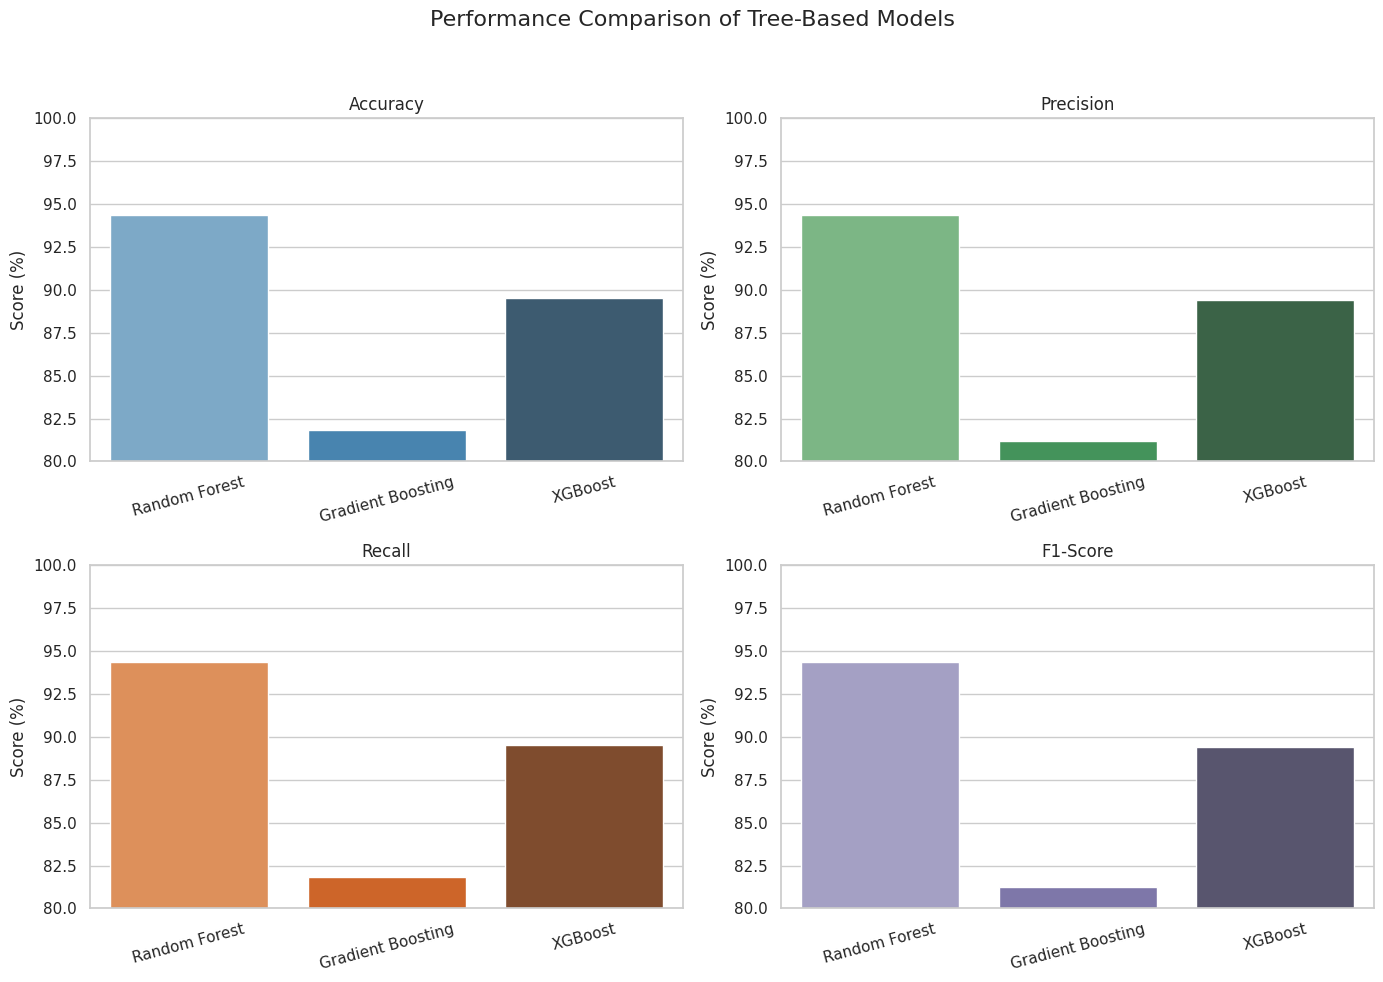

In [119]:
from sklearn.metrics import classification_report, accuracy_score


models = {
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "XGBoost": xgb
}

# Store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Extract and collect metrics
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc * 100)
    metrics['Precision'].append(report['weighted avg']['precision'] * 100)
    metrics['Recall'].append(report['weighted avg']['recall'] * 100)
    metrics['F1-Score'].append(report['weighted avg']['f1-score'] * 100)

# Create DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Performance Comparison of Tree-Based Models", fontsize=16)

sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axs[0, 0], palette="Blues_d")
axs[0, 0].set_title('Accuracy')

sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axs[0, 1], palette="Greens_d")
axs[0, 1].set_title('Precision')

sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axs[1, 0], palette="Oranges_d")
axs[1, 0].set_title('Recall')

sns.barplot(x='Model', y='F1-Score', data=metrics_df, ax=axs[1, 1], palette="Purples_d")
axs[1, 1].set_title('F1-Score')

for ax in axs.flat:
    ax.set_ylim(80, 100)
    ax.set_xlabel('')
    ax.set_ylabel('Score (%)')
    ax.tick_params(axis='x', rotation=15)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()